In [2]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution:
    def largestBSTSubtree(self, root: TreeNode) -> int:

        self.res = 0
        def isValid(root, t1, t2):
            if not root:
                return 0
            if root.val >= t2 or root.val <= t1:
                return float("-inf")
            return 1 + isValid(root.left, t1, root.val) + isValid(root.right, root.val, t2)

        def helper(root):
            if not root:
                return 
            self.res = max(self.res, isValid(root,float("-inf"), float("inf")) )
            helper(root.left)
            helper(root.right)
        helper(root)
        return self.res

In [9]:
class Solution:
    def largestBSTSubtree(self, root: TreeNode) -> int:
        self.res = 0
        def isValid(root, t1, t2):
            if not root:
                return 0
            if root.val >= t2 or root.val <= t1:
                return float("inf")
            return 1 + isValid(root.left, t1, root.val) + isValid(root.right, root.val, t2)
        def helper(root):
            if not root:
                return
            self.res = max(self.res, isValid(root, float("-inf"), float("inf")))
            helper(root.left)
            helper(root.right)
        
        helper(root)
        return self.res

In [3]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def largestBSTSubtree(self, root: TreeNode) -> int:
        
        def helper(root):
            if not root:
                return float("inf"), float("-inf"), 0
            l_min, l_max, lv = helper(root.left)
            r_min, r_max, rv = helper(root.right)
            # print(root.val, l_max, r_min)
            if  l_max < root.val < r_min:
                return min(l_min, root.val), max(root.val, r_max), 1 + lv + rv
            return float("-inf"), float("inf"), max(lv, rv)
        
        return helper(root)[2]

In [4]:
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision.models import AlexNet
import matplotlib.pyplot as plt

0 0.08535533905932738
1 0.05
2 0.014644660940672627
3 0.0
4 0.014644660940672622
5 0.05000000000000001
6 0.0853553390593274
7 0.10000000000000003
8 0.0853553390593274
9 0.05000000000000003


D:\Anaconda\lib\site-packages\torch\optim\lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


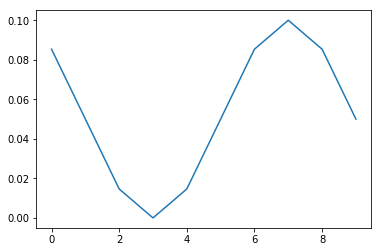

In [8]:
model = AlexNet(num_classes=2)
optimizer = optim.SGD(params = model.parameters(), lr=0.1)

#根据式子进行计算
scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=4)

plt.figure()
x = list(range(10))
y = []

for epoch in range(10):
    scheduler.step()
    lr = scheduler.get_last_lr()
    print(epoch, scheduler.get_last_lr()[0])
    y.append(scheduler.get_last_lr()[0])

plt.plot(x,y)
plt.show()

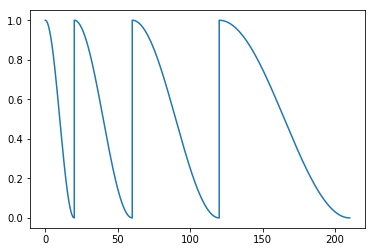

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def compute_eta_t(eta_min, eta_max, T_cur, Ti):
    '''Equation (5).
    # Arguments
        eta_min,eta_max,T_cur,Ti are same as equation.
    # Returns
        eta_t
    '''
    pi = np.pi
    eta_t = eta_min + 0.5 * (eta_max - eta_min) * (np.cos(pi * T_cur / Ti) + 1)
    return eta_t

# 每Ti个epoch进行一次restart。
Ti = [20, 40, 60, 90]
n_batches = 200
eta_ts = []
for ti in Ti:
    T_cur = np.arange(0, ti, 1 / n_batches)
    for t_cur in T_cur:
        eta_ts.append(compute_eta_t(0, 1, t_cur, ti))
        
n_iterations = sum(Ti) * n_batches
epoch = np.arange(0, n_iterations) / n_batches

plt.plot(epoch, eta_ts)
plt.show()